In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../data/external/oecd-european-inflation-rates.csv")
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,METHODOLOGY,Methodology,...,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,BASE_PER,Base period,DURABILITY,Durability,DECIMALS,Decimals
0,DATAFLOW,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_HICP(1.0),Eurostat harmonised index of consumer prices (...,I,ISL,Iceland,M,Monthly,HICP,Eurostat harmonised index of consumer prices (...,...,A,Normal value,NaN,NaN,NaN,NaN,NaN,NaN,2,Two
1,DATAFLOW,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_HICP(1.0),Eurostat harmonised index of consumer prices (...,I,ISL,Iceland,M,Monthly,HICP,Eurostat harmonised index of consumer prices (...,...,A,Normal value,NaN,NaN,NaN,NaN,NaN,NaN,2,Two
2,DATAFLOW,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_HICP(1.0),Eurostat harmonised index of consumer prices (...,I,ISL,Iceland,M,Monthly,HICP,Eurostat harmonised index of consumer prices (...,...,A,Normal value,NaN,NaN,NaN,NaN,NaN,NaN,2,Two
3,DATAFLOW,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_HICP(1.0),Eurostat harmonised index of consumer prices (...,I,SVN,Slovenia,M,Monthly,HICP,Eurostat harmonised index of consumer prices (...,...,A,Normal value,NaN,NaN,NaN,NaN,NaN,NaN,2,Two
4,DATAFLOW,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_HICP(1.0),Eurostat harmonised index of consumer prices (...,I,SVN,Slovenia,M,Monthly,HICP,Eurostat harmonised index of consumer prices (...,...,A,Normal value,NaN,NaN,NaN,NaN,NaN,NaN,2,Two


In [22]:
df = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
df = df[df["Reference area"] != "United States"]
print(len(df.drop_duplicates(subset=["Reference area"])))
df.drop_duplicates(subset=["Reference area"])

31


,Reference area,TIME_PERIOD,OBS_VALUE
47,Belgium,2023-10,-1.7
322,Netherlands,2023-10,-1.0
29,Denmark,2023-10,-0.4
337,Latvia,2024-05,0.0
124,Ireland,2024-09,0.0
70,Lithuania,2024-09,0.4
235,Finland,2024-05,0.4
168,Italy,2023-12,0.5
44,Slovenia,2024-09,0.7
58,Luxembourg,2024-09,0.8


In [26]:
df["mean_inflation_rate"] = df.groupby("Reference area")["OBS_VALUE"].transform("mean")
df.sort_values(by="mean_inflation_rate", inplace=True)


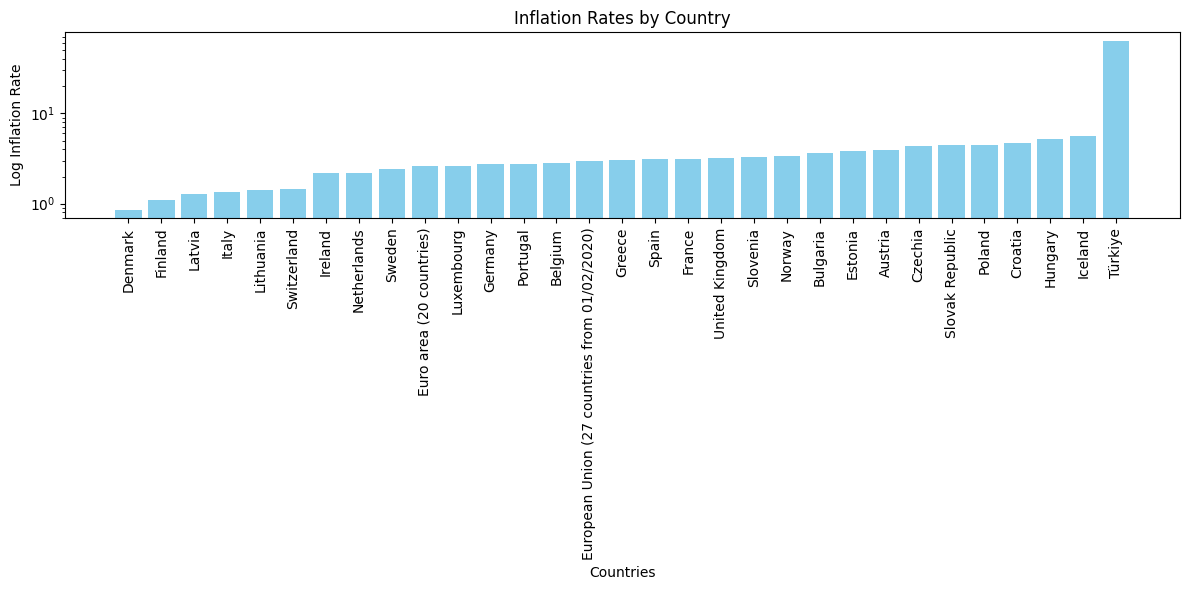

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(df["Reference area"], df["mean_inflation_rate"], color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Log Inflation Rate')
plt.yscale("log")
plt.title('Inflation Rates by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()